<a href="https://colab.research.google.com/github/Deepanshu-8126/Projects-Data-Analysis-Beg-to-Adv-/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = {
    "Name": ["Rahul", "Anjali", "Aman", "Neha", "Rohit"],
    "Maths": [78, 88, 45, 95, 60],
    "Science": [85, 90, 50, 92, None],
    "English": [74, 92, 48, 94, 55]
}

df = pd.DataFrame(data)
df

,Name,Maths,Science,English
0,Rahul,78,85.0,74
1,Anjali,88,90.0,92
2,Aman,45,50.0,48
3,Neha,95,92.0,94
4,Rohit,60,NaN,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     5 non-null      object 
 1   Maths    5 non-null      int64  
 2   Science  4 non-null      float64
 3   English  5 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 292.0+ bytes


In [ ]:
# Missing marks full
# Average at place of missing

df['Science']
df["Science"] = df["Science"].fillna(df["Science"].mean())
df

,Name,Maths,Science,English
0,Rahul,78,85.00,74
1,Anjali,88,90.00,92
2,Aman,45,50.00,48
3,Neha,95,92.00,94
4,Rohit,60,79.25,55


In [ ]:
# Total and Average marks
df["Total"] = df["Maths"] + df["Science"] + df["English"]
df

# Average
df["Average"] = df[ 'Total'] /3
df

,Name,Maths,Science,English,Total,Average
0,Rahul,78,85.00,74,237.00,79.000000
1,Anjali,88,90.00,92,270.00,90.000000
2,Aman,45,50.00,48,143.00,47.666667
3,Neha,95,92.00,94,281.00,93.666667
4,Rohit,60,79.25,55,194.25,64.750000


In [ ]:
df['Average']

# Pass / Fail
df['Result'] =df["Average"].apply(lambda x: "Pass" if x >= 50 else "Fail")
df

,Name,Maths,Science,English,Total,Average,Result
0,Rahul,78,85.00,74,237.00,79.000000,Pass
1,Anjali,88,90.00,92,270.00,90.000000,Pass
2,Aman,45,50.00,48,143.00,47.666667,Fail
3,Neha,95,92.00,94,281.00,93.666667,Pass
4,Rohit,60,79.25,55,194.25,64.750000,Pass


In [ ]:
subject_avg = df[["Maths", "Science", "English"]].mean()
subject_avg

,0
Maths,73.20
Science,79.25
English,72.60


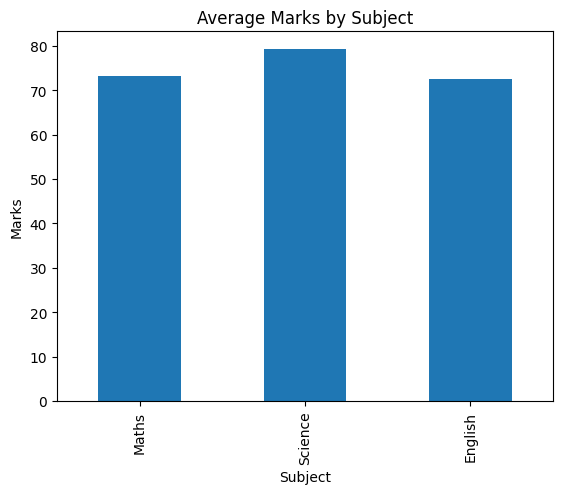

In [ ]:
subject_avg.plot(kind="bar")
plt.title("Average Marks by Subject")
plt.xlabel("Subject")
plt.ylabel("Marks")
plt.show()

In [ ]:
df["Grade"] = df["Average"].apply(
    lambda x: "A" if x >= 90 else
              "B" if x >= 75 else
              "C" if x >= 60 else
              "D"
)
df

,Name,Maths,Science,English,Total,Average,Result,Grade
0,Rahul,78,85.00,74,237.00,79.000000,Pass,B
1,Anjali,88,90.00,92,270.00,90.000000,Pass,A
2,Aman,45,50.00,48,143.00,47.666667,Fail,D
3,Neha,95,92.00,94,281.00,93.666667,Pass,A
4,Rohit,60,79.25,55,194.25,64.750000,Pass,C


In [ ]:
grade_map = {"A": 4, "B": 3, "C": 2, "D": 1}

df["Grade_Num"] = df["Grade"].map(grade_map)
df

,Name,Maths,Science,English,Total,Average,Result,Grade,Grade_Num
0,Rahul,78,85.00,74,237.00,79.000000,Pass,B,3
1,Anjali,88,90.00,92,270.00,90.000000,Pass,A,4
2,Aman,45,50.00,48,143.00,47.666667,Fail,D,1
3,Neha,95,92.00,94,281.00,93.666667,Pass,A,4
4,Rohit,60,79.25,55,194.25,64.750000,Pass,C,2


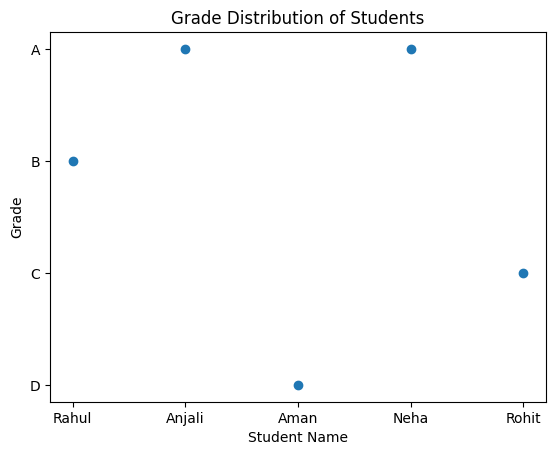

In [ ]:

# scatter plot

plt.figure()
plt.scatter(df["Name"], df["Grade_Num"])
plt.title("Grade Distribution of Students")
plt.xlabel("Student Name")
plt.ylabel("Grade")
plt.yticks([1, 2, 3, 4], ["D", "C", "B", "A"])
plt.show()

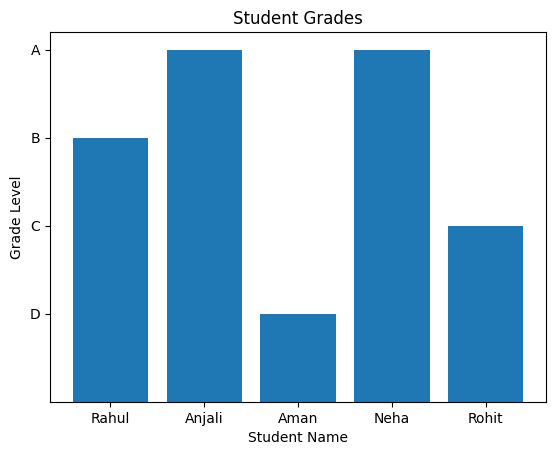

In [ ]:
plt.figure()
plt.bar(df["Name"], df["Grade_Num"])
plt.title("Student Grades")
plt.xlabel("Student Name")
plt.ylabel("Grade Level")
plt.yticks([1, 2, 3, 4], ["D", "C", "B", "A"])
plt.show()

In [ ]:
df

,Name,Maths,Science,English,Total,Average,Result,Grade,Grade_Num
0,Rahul,78,85.00,74,237.00,79.000000,Pass,B,3
1,Anjali,88,90.00,92,270.00,90.000000,Pass,A,4
2,Aman,45,50.00,48,143.00,47.666667,Fail,D,1
3,Neha,95,92.00,94,281.00,93.666667,Pass,A,4
4,Rohit,60,79.25,55,194.25,64.750000,Pass,C,2


In [ ]:
long_df = df.melt(
    id_vars="Name",
    value_vars=["Maths", "Science", "English"],
    var_name="Subject",
    value_name="Marks"
)

long_df

,Name,Subject,Marks
0,Rahul,Maths,78.00
1,Anjali,Maths,88.00
2,Aman,Maths,45.00
3,Neha,Maths,95.00
4,Rohit,Maths,60.00
5,Rahul,Science,85.00
6,Anjali,Science,90.00
7,Aman,Science,50.00
8,Neha,Science,92.00
9,Rohit,Science,79.25


In [ ]:
# Topper according to subject
long_df.sort_values('Marks',ascending=False)

,Name,Subject,Marks
3,Neha,Maths,95.00
13,Neha,English,94.00
8,Neha,Science,92.00
11,Anjali,English,92.00
6,Anjali,Science,90.00
1,Anjali,Maths,88.00
5,Rahul,Science,85.00
9,Rohit,Science,79.25
0,Rahul,Maths,78.00
10,Rahul,English,74.00


Text(0, 0.5, 'Marks')

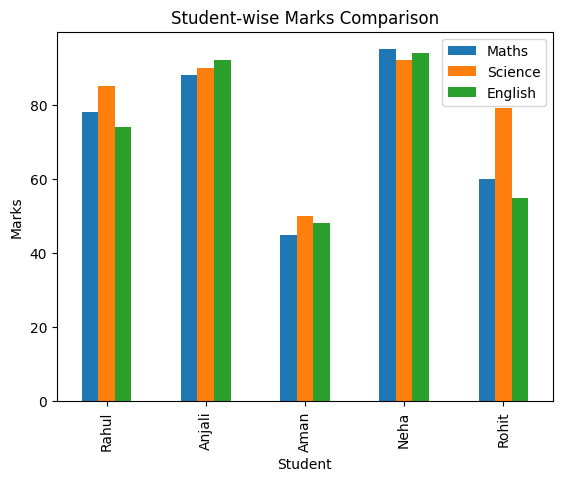

In [ ]:
# plot subject wise student
df.set_index("Name")[["Maths", "Science", "English"]].plot(kind="bar")
plt.title("Student-wise Marks Comparison")
plt.xlabel("Student")
plt.ylabel("Marks")

In [ ]:
df

,Name,Maths,Science,English,Total,Average,Result,Grade,Grade_Num
0,Rahul,78,85.00,74,237.00,79.000000,Pass,B,3
1,Anjali,88,90.00,92,270.00,90.000000,Pass,A,4
2,Aman,45,50.00,48,143.00,47.666667,Fail,D,1
3,Neha,95,92.00,94,281.00,93.666667,Pass,A,4
4,Rohit,60,79.25,55,194.25,64.750000,Pass,C,2


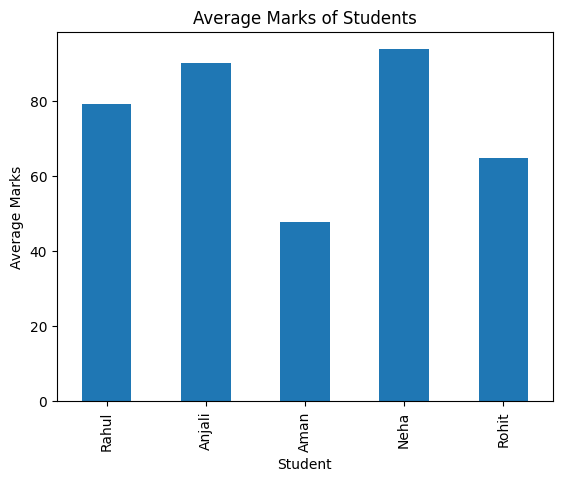

In [27]:
df.set_index("Name")['Average'].plot(kind="bar")

# set_index Name and only need average column
plt.title("Average Marks of Students")
plt.xlabel("Student")
plt.ylabel("Average Marks")
plt.show()

In [29]:
# Pass and fail chart
df['Result'].value_counts()

,count
Result,
Pass,4
Fail,1


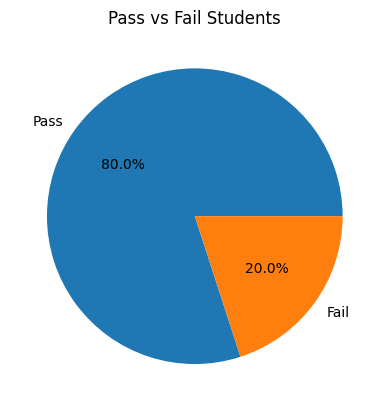

In [32]:
df["Result"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pass vs Fail Students")
plt.ylabel("")
plt.show()

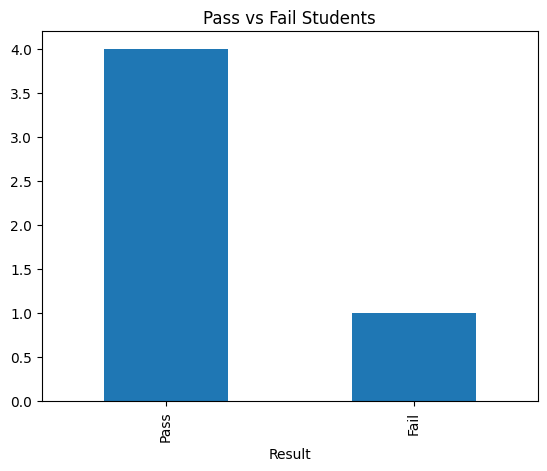

In [33]:

df["Result"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Students")
plt.ylabel("")
plt.show()

In [53]:
# Subject wise topper
subjects = ["Maths", "Science", "English"]
topper_marks=[]
topper_name = []
for sub in subjects:
    topper = df.loc[df[sub].idxmax(), "Name"]
    marks = df[sub].max()
    print(f"{sub} ,Topper: {topper} ,({marks}")
    topper_marks.append(marks)
    topper_name.append(topper)

Maths ,Topper: Neha ,(95
Science ,Topper: Neha ,(92.0
English ,Topper: Neha ,(94


In [54]:
print(topper_name)
print(topper_marks)

['Neha', 'Neha', 'Neha']
[95, 92.0, 94]


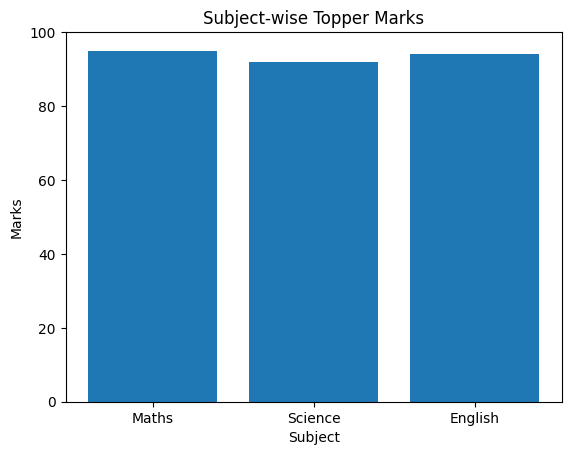

In [55]:
import matplotlib.pyplot as plt

plt.bar(subjects, topper_marks)
plt.title("Subject-wise Topper Marks")
plt.xlabel("Subject")
plt.ylabel("Marks")
plt.ylim(0, 100)

plt.show()

In [59]:
class_avg = df[["Maths", "Science", "English"]].mean()
print(class_avg)

Maths      73.20
Science    79.25
English    72.60
dtype: float64


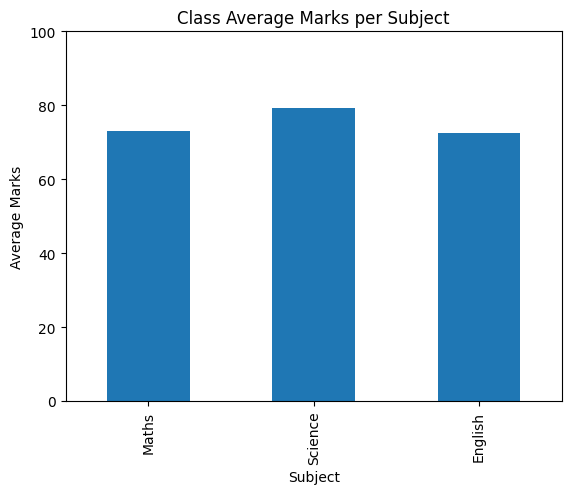

In [62]:
# Class average bar chart
class_avg.plot(kind="bar")
plt.title("Class Average Marks per Subject")
plt.xlabel("Subject")
plt.ylabel("Average Marks")
plt.ylim(0,100)
plt.show()